In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned')

In [3]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'min_salary',
       'max_salary', 'avg_salary', 'desc_len', 'City', 'State', 'Remote',
       'Country', 'Min Revenue', 'Max Revenue', 'Avg Revenue', 'Age',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel'],
      dtype='object')

In [4]:
#df = df.drop('Unnamed: 0', axis=1)

In [5]:
#df.head()

In [6]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' or 'ml' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principle' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr' in title.lower():
        return 'jr'
    else:
        return 'na'

In [7]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [8]:
df.job_simp.value_counts()

job_simp
data scientist    790
mle               217
data engineer       1
Name: count, dtype: int64

In [9]:
df['seniority'] = df['Job Title'].apply(seniority)

In [10]:
df.seniority.value_counts()

seniority
na        614
senior    385
jr          9
Name: count, dtype: int64

In [11]:
df.describe()

,Unnamed: 0,Rating,Founded,min_salary,max_salary,avg_salary,desc_len,Remote,Min Revenue,Max Revenue,Avg Revenue,Age,python_yn,R_yn,spark,aws,excel
count,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.0,1008.000000,1008.000000,1008.000000
mean,544.789683,3.883532,1849.531746,121.943452,187.065476,153.751488,4106.027778,0.006944,5180.259921,6016.406746,5598.325397,55.882937,0.682540,0.0,0.180556,0.225198,0.343254
std,317.493954,0.517985,464.849355,34.716296,56.554986,44.338221,3419.871072,0.083085,4683.622852,4567.294331,4546.506097,56.331937,0.465719,0.0,0.384840,0.417920,0.475031
min,0.000000,-1.000000,-1.000000,32.000000,87.000000,11.500000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,270.750000,3.600000,1922.000000,100.000000,148.000000,126.500000,607.500000,0.000000,5.000000,25.000000,15.000000,15.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,540.500000,3.900000,1977.000000,117.000000,179.000000,145.500000,4204.000000,0.000000,5000.000000,10000.000000,7500.000000,42.000000,1.000000,0.0,0.000000,0.000000,0.000000
75%,818.500000,4.200000,2005.000000,136.000000,219.250000,178.000000,5950.750000,0.000000,10000.000000,10000.000000,10000.000000,66.000000,1.000000,0.0,0.000000,0.000000,1.000000
max,1099.000000,5.000000,2023.000000,300.000000,500.000000,400.000000,24710.000000,1.000000,10000.000000,10000.000000,10000.000000,228.000000,1.000000,0.0,1.000000,1.000000,1.000000


<Axes: >

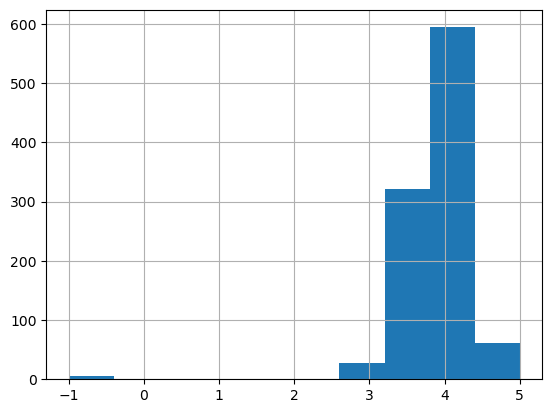

In [13]:
df.Rating.hist()

<Axes: >

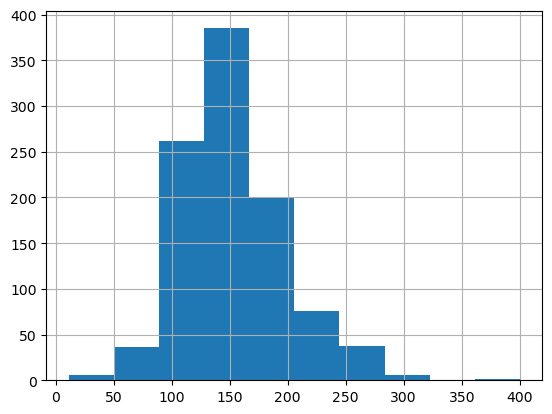

In [14]:
df.avg_salary.hist()

<Axes: >

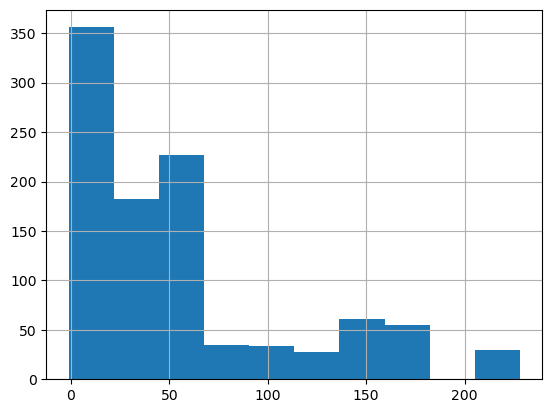

In [15]:
df.Age.hist()

<Axes: >

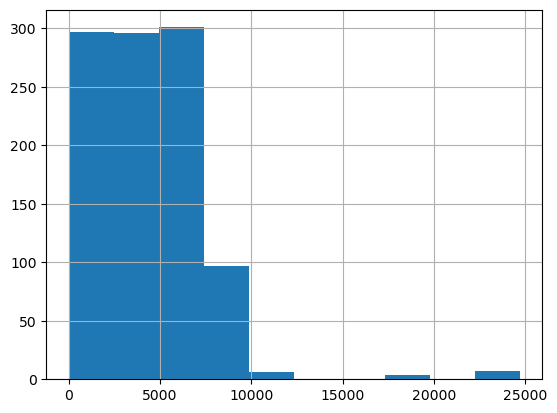

In [16]:
df.desc_len.hist()

<Axes: >

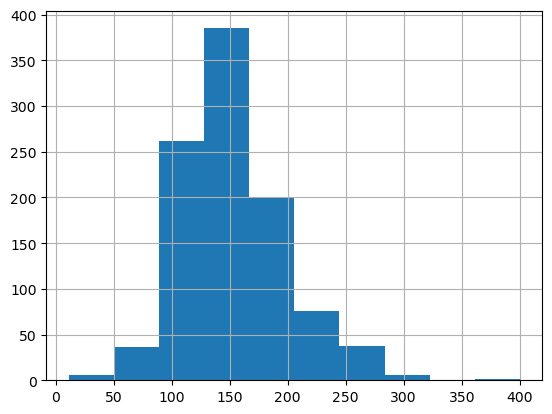

In [17]:
df.avg_salary.hist()

<Axes: >

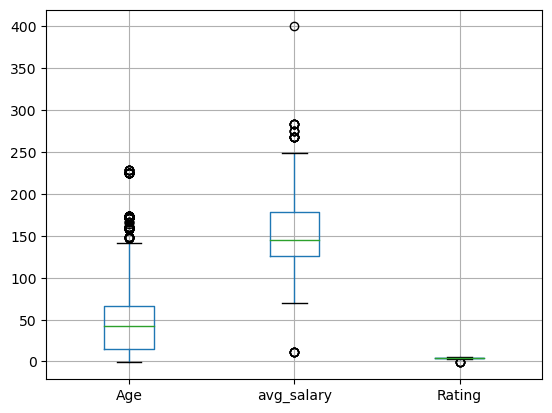

In [18]:
df.boxplot(column = ['Age', 'avg_salary', 'Rating'])

<Axes: >

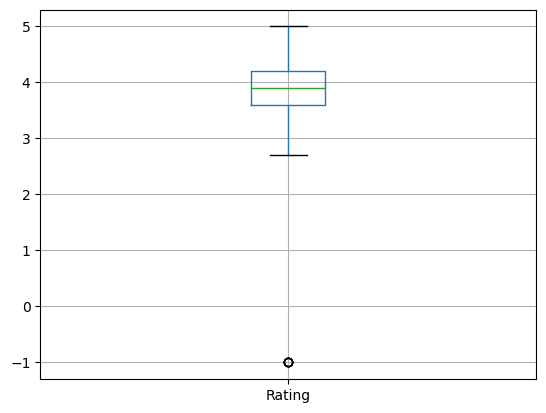

In [19]:
df.boxplot(column = 'Rating')

<Axes: >

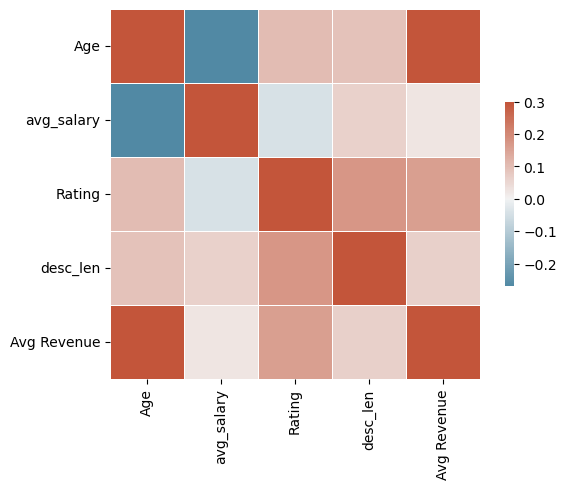

In [20]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df[['Age', 'avg_salary', 'Rating', 'desc_len', 'Avg Revenue']].corr(), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [22]:
df_cat = df[['Size', 'State', 'City', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'python_yn', 'R_yn', 'spark',
       'aws', 'excel']]

graph for Size: total = 8


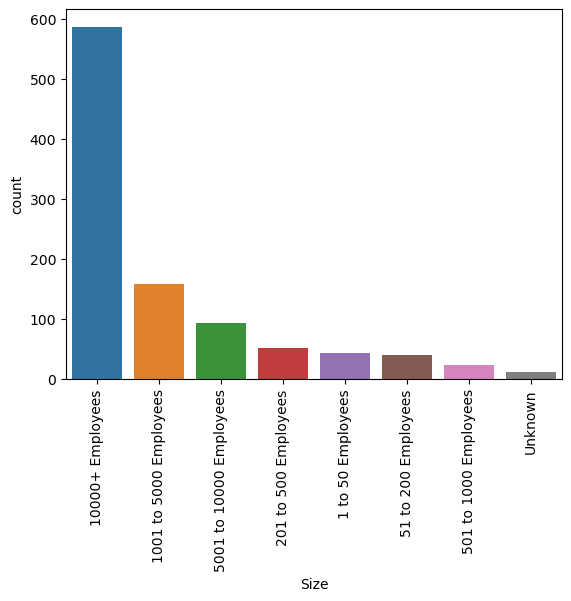

graph for State: total = 27


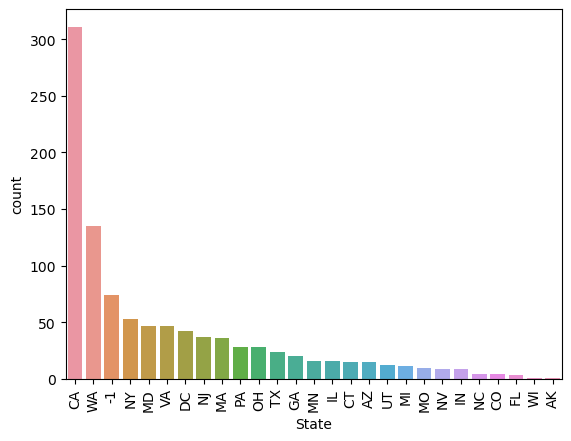

graph for City: total = 85


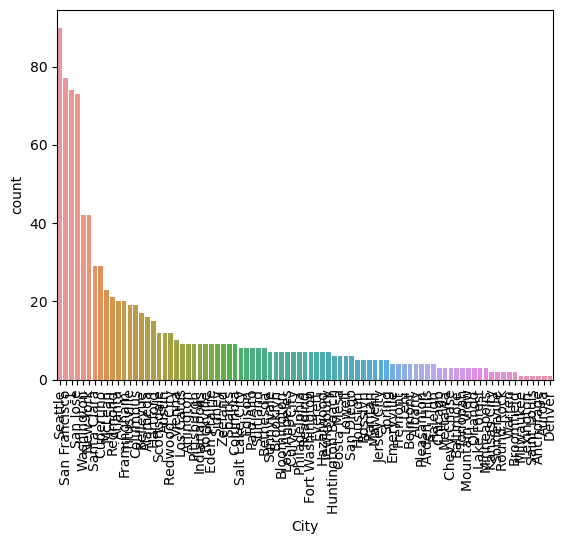

graph for Type of ownership: total = 8


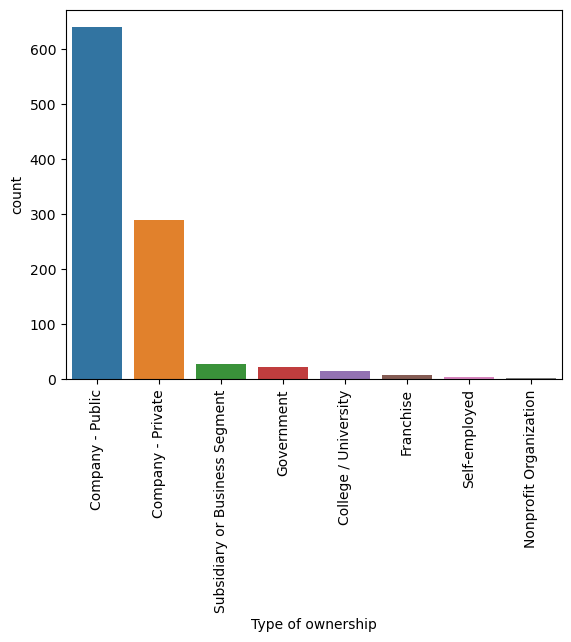

graph for Industry: total = 42


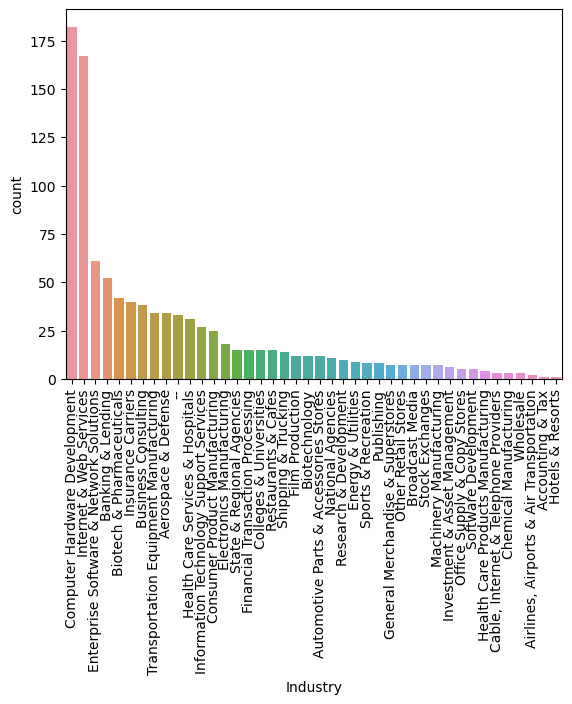

graph for Sector: total = 19


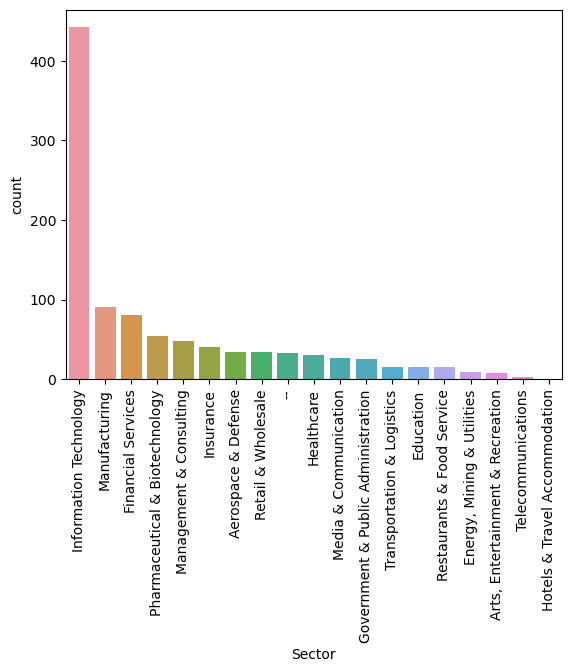

graph for Revenue: total = 10


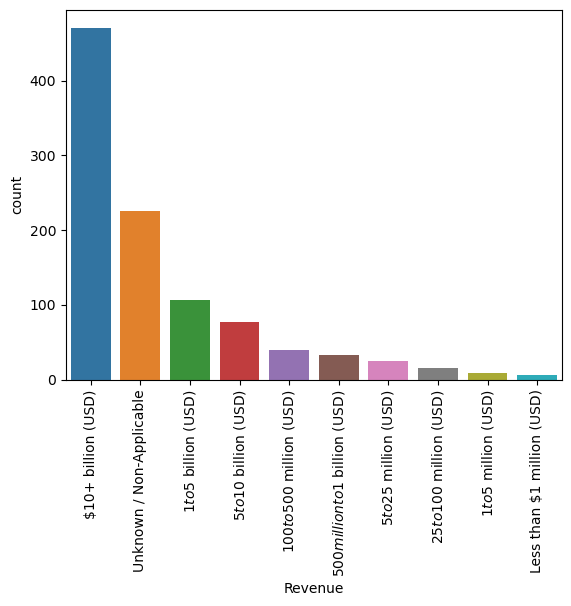

graph for python_yn: total = 2


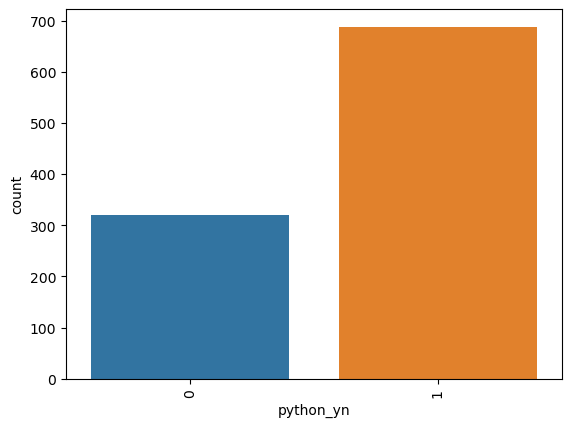

graph for R_yn: total = 1


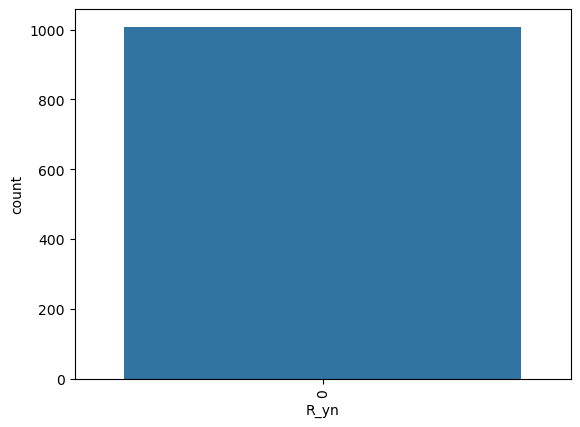

graph for spark: total = 2


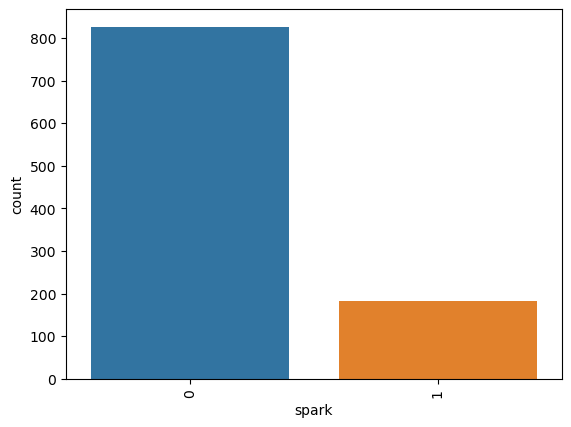

graph for aws: total = 2


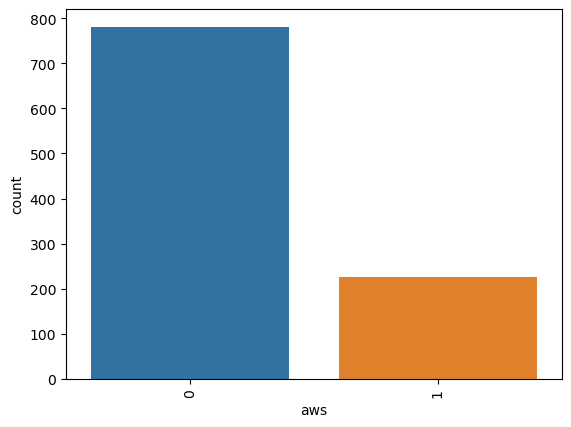

graph for excel: total = 2


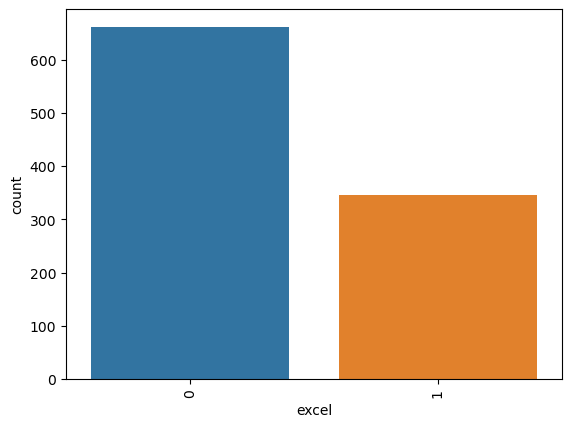

In [23]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    chart.set
    plt.show()

Graph for Company Name: total unique = 140


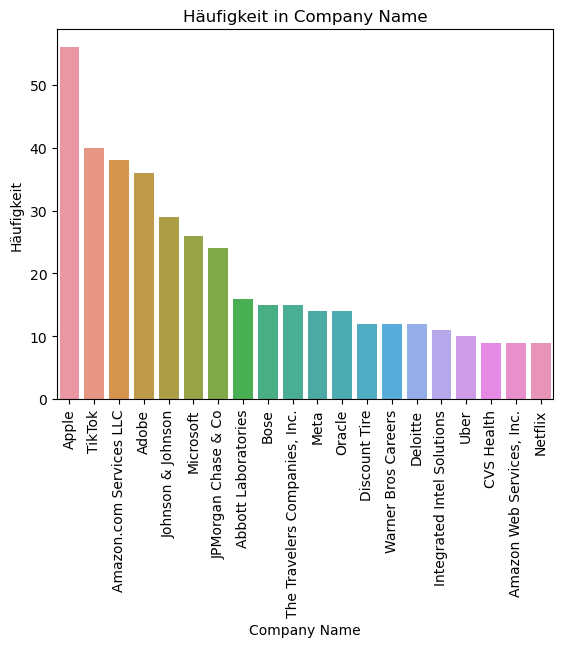

Graph for Size: total unique = 8


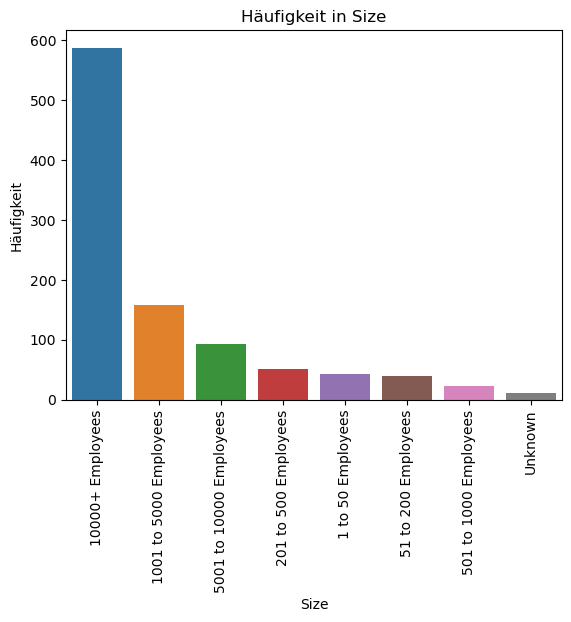

Graph for State: total unique = 27


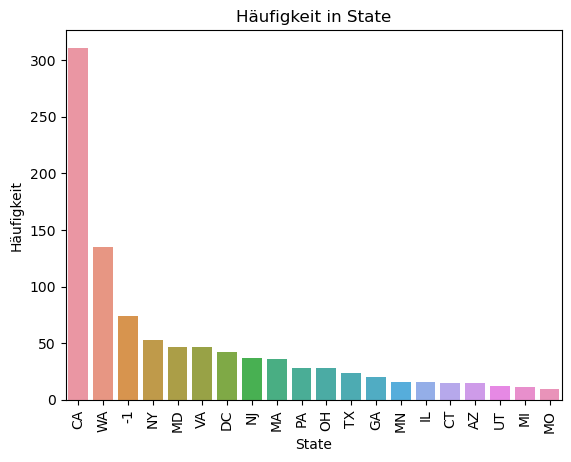

Graph for City: total unique = 85


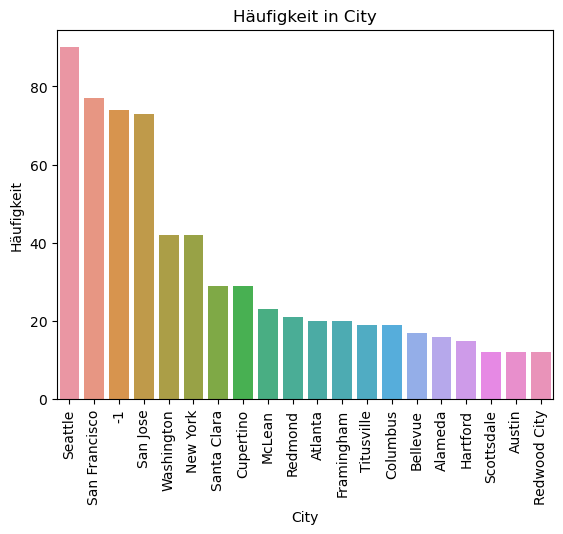

Graph for Type of ownership: total unique = 8


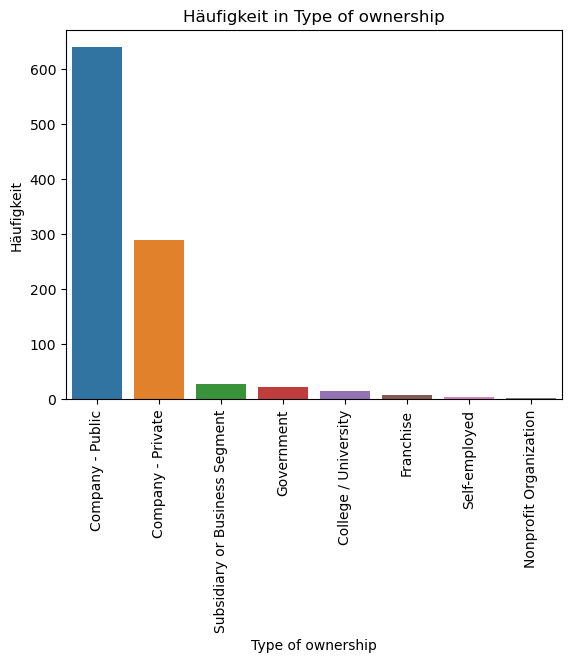

Graph for Industry: total unique = 42


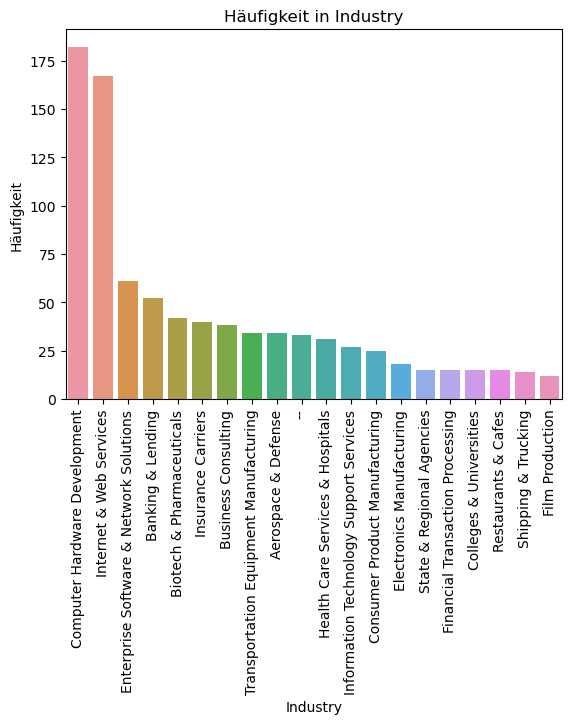

Graph for Sector: total unique = 19


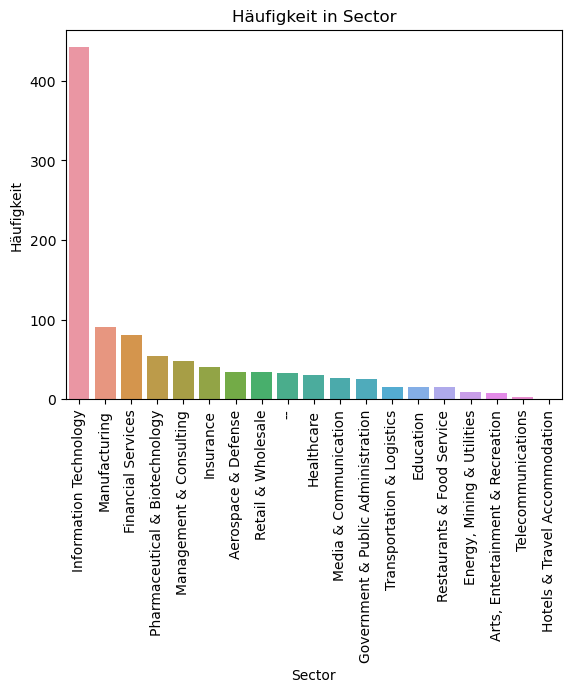

Graph for Revenue: total unique = 10


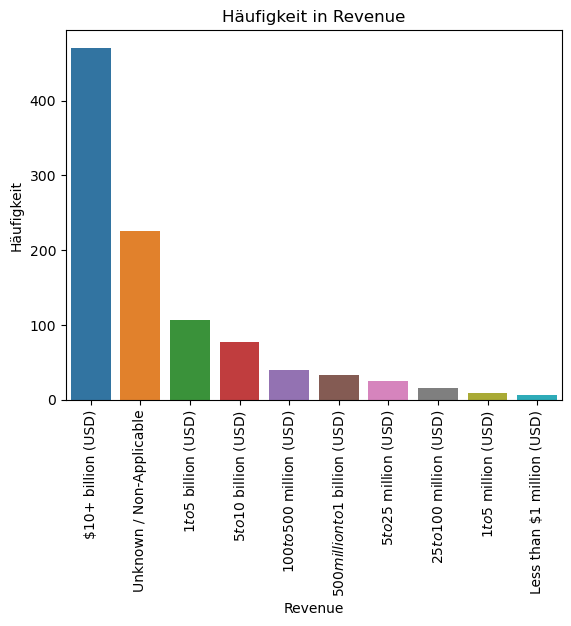

In [25]:
# Liste der Spaltennamen, für die Diagramme erstellt werden sollen
columns = ['Company Name', 'Size', 'State', 'City', 'Type of ownership', 'Industry', 'Sector', 'Revenue']

# Iteration über die Liste der Spaltennamen
for col_name in columns:
    # Verwendung von value_counts() um die Häufigkeit jedes einzigartigen Wertes in der Spalte zu zählen
    cat_num = df[col_name].value_counts()  # Betrachtung aller Werte in jeder Spalte
    print("Graph for %s: total unique = %d" % (col_name, len(cat_num)))

    # Erstellung des Balkendiagramms mit seaborn
    chart = sns.barplot(x=cat_num.index[:20], y=cat_num.values[:20])  # Beschränkung auf die 20 häufigsten Werte
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)  # Drehung der X-Achsen-Beschriftungen für bessere Lesbarkeit
    chart.set_title(f'Häufigkeit in {col_name}')  # Hinzufügen eines Titels zum Diagramm
    chart.set_ylabel('Häufigkeit')  # Beschriftung der Y-Achse
    chart.set_xlabel(col_name)  # Beschriftung der X-Achse

    plt.show()  # Anzeigen des Diagramms

Graph for Size: total = 6


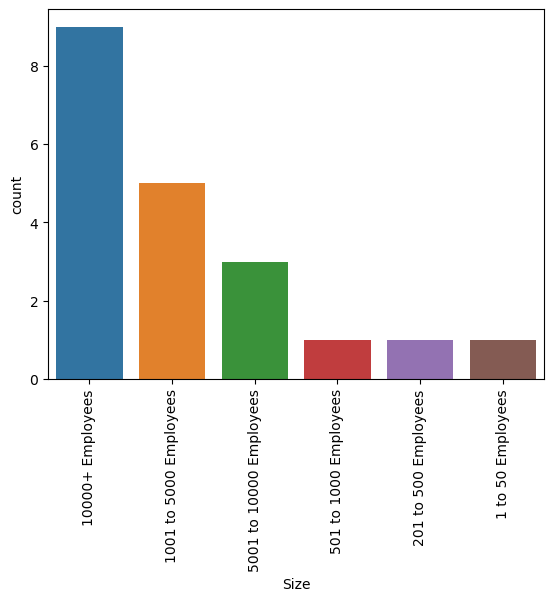

Graph for State: total = 12


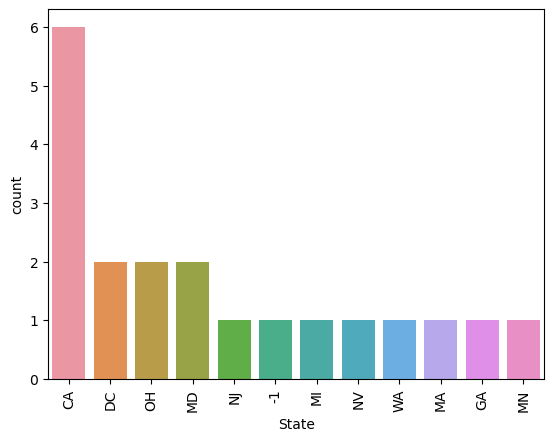

Graph for City: total = 18


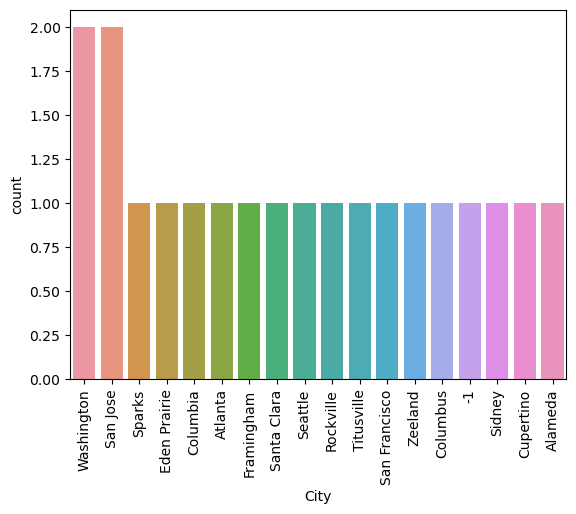

Graph for Type of ownership: total = 3


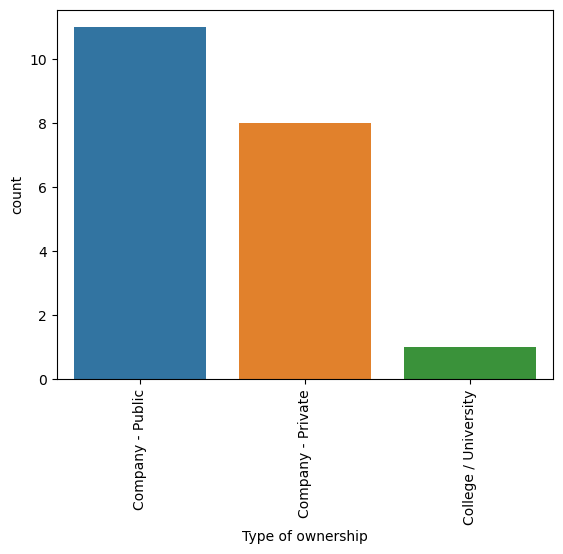

Graph for Industry: total = 14


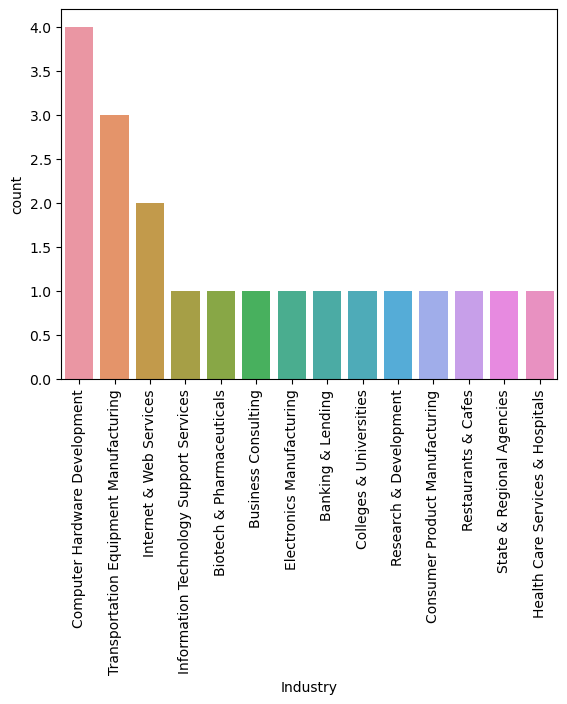

Graph for Sector: total = 9


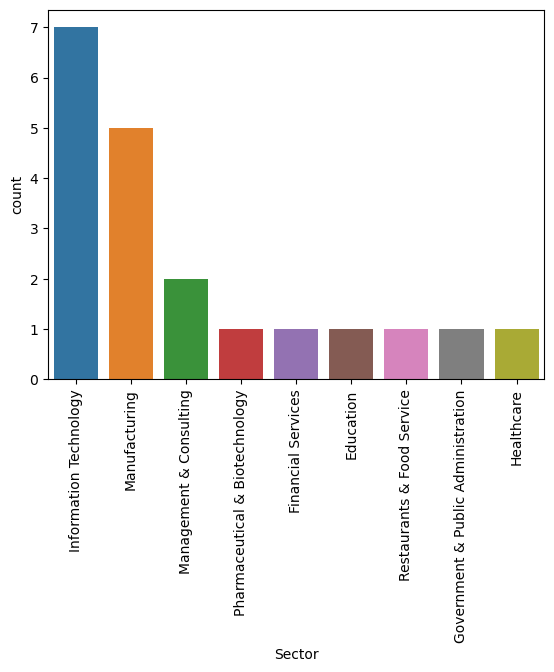

Graph for Revenue: total = 7


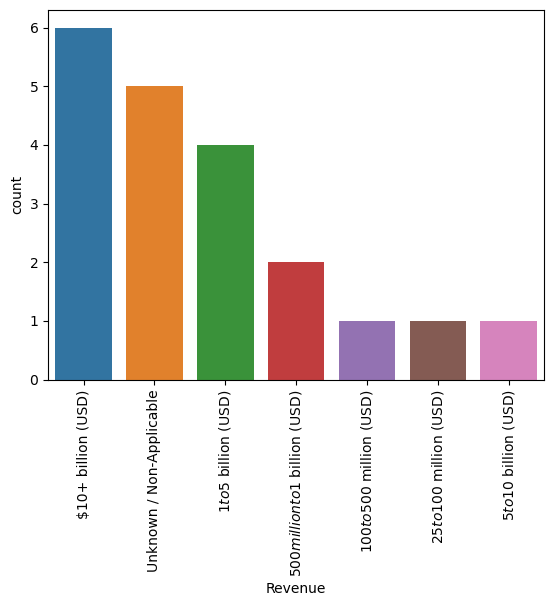

In [26]:
# Liste der Spaltennamen, für die Diagramme erstellt werden sollen
columns = ['Size', 'State', 'City', 'Type of ownership', 'Industry', 'Sector', 'Revenue']

# Iteration über die Liste der Spaltennamen
for i in columns:
    # Anwenden von value_counts() auf die ersten 20 Zeilen jeder Spalte
    cat_num = df_cat[i][:20].value_counts()
    print("Graph for %s: total = %d" % (i, len(cat_num)))

    # Erstellung des Balkendiagramms mit seaborn
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)  # Drehung der X-Achsen-Beschriftungen für bessere Lesbarkeit

    plt.show()  # Anzeigen des Diagramms

In [27]:
pd.pivot_table(df, index = ['job_simp', 'seniority'], values = ['min_salary', 'max_salary', 'avg_salary'])

avg_salary  max_salary  min_salary
job_simp       seniority                                    
data engineer  na         143.000000  168.000000  118.000000
data scientist jr         100.055556  121.555556   78.555556
               na         147.327292  178.660981  119.230277
               senior     154.786859  188.929487  120.644231
mle            na         155.934028  186.166667  125.701389
               senior     193.061644  243.205479  142.917808

In [28]:
pd.pivot_table(df, index = ['State', 'job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('State', ascending=False)

avg_salary
State job_simp                  
WI    data scientist           1
WA    mle                     49
      data scientist          86
VA    data scientist          47
UT    data scientist          12
TX    data scientist          24
PA    mle                      5
      data scientist          23
OH    data scientist          23
      mle                      5
NY    mle                     15
      data scientist          38
NV    data scientist           9
NJ    mle                     20
      data scientist          17
NC    data scientist           4
MO    data scientist          10
MN    data scientist          16
MI    data scientist          11
MD    mle                      3
      data scientist          44
MA    mle                     11
      data scientist          24
      data engineer            1
IN    data scientist           9
IL    mle                      3
      data scientist          13
GA    data scientist          20
FL    data scientist           1
      mle                      2
DC    data scientist          42
CT    data scientist          15
CO    mle                      1
      data scientist           3
CA    mle                     81
      data scientist         230
AZ    data scientist          15
AK    data scientist           1
-1    mle                     22
      data scientist          52

In [29]:
pd.pivot_table(df, index = 'City', values = 'avg_salary').sort_values('avg_salary', ascending=False)

,avg_salary
City,
Mountain View,226.000000
Cupertino,212.517241
Costa Mesa,210.000000
San Jose,209.979452
Brooklyn,208.000000
...,...
Denver,90.000000
Zeeland,84.500000
Malvern,83.000000


In [30]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'State', values = 'avg_salary').sort_values('avg_salary', ascending=False)

,avg_salary
State,
CA,178.786957
WA,169.581395
CT,162.133333
NY,154.907895
-1,151.759615
GA,147.650000
CO,141.000000
VA,138.893617
IL,138.269231


In [31]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'min_salary',
       'max_salary', 'avg_salary', 'desc_len', 'City', 'State', 'Remote',
       'Country', 'Min Revenue', 'Max Revenue', 'Avg Revenue', 'Age',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simp', 'seniority'],
      dtype='object')

In [32]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'desc_len', 'Type of ownership', 'avg_salary']]

In [33]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values='avg_salary').sort_values('avg_salary',ascending=False))

Rating
        avg_salary
Rating            
 4.4    226.000000
 3.4    217.786885
-1.0    205.000000
 4.6    190.600000
 2.9    175.000000
 4.3    166.500000
 4.2    165.718121
 3.9    161.125000
 3.8    152.326389
 4.0    149.897059
 3.1    143.727273
 4.5    142.900000
 3.6    142.170000
 3.0    142.000000
 4.1    141.985000
 3.3    139.951613
 3.2    131.750000
 4.7    128.285714
 5.0    125.156250
 3.5    124.062500
 3.7    121.653333
 2.7    119.500000
 4.9    111.833333
Industry
                                         avg_salary
Industry                                           
Other Retail Stores                      208.000000
Software Development                     205.200000
Internet & Web Services                  181.431138
Computer Hardware Development            177.579670
Film Production                          171.000000
Airlines, Airports & Air Transportation  170.000000
Machinery Manufacturing                  164.000000
Biotechnology                            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [ ]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

In [35]:
# Installation der benötigten Pakete
!pip install wordcloud
!pip install nltk

# Importieren der Pakete und Module
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Herunterladen der benötigten NLTK-Ressourcen
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

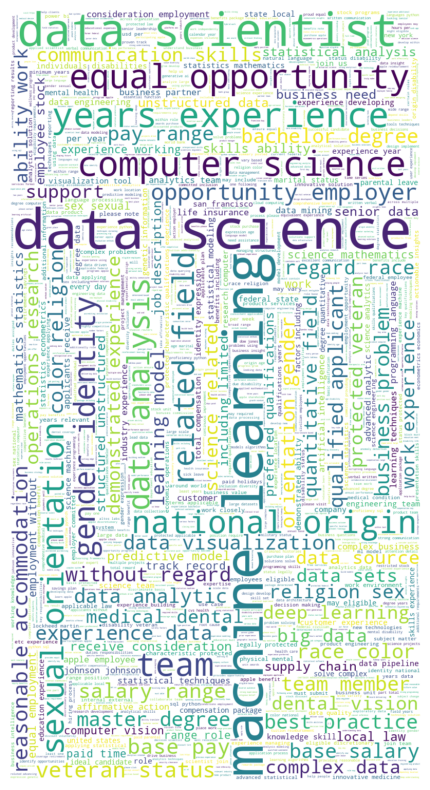

In [39]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """"remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color="white", random_state=1, stopwords=STOPWORDS, max_words = 2000, width = 800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10, 10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [41]:
df.to_csv('salary_data')